In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [2]:
app_train = pd.read_csv('../capstone#1/application_train.csv')
app_test = pd.read_csv('../capstone#1/application_test.csv')
pos = pd.read_csv('../capstone#1/POS_CASH_balance.csv')
bureau = pd.read_csv('../capstone#1/bureau.csv')
bureau_b = pd.read_csv('../capstone#1/bureau_balance.csv')
payment = pd.read_csv('../capstone#1/installments_payments.csv')
pre_app = pd.read_csv('../capstone#1/previous_application.csv')
cc = pd.read_csv('../capstone#1/credit_card_balance.csv')

In [3]:
print('Size of application_train data', app_train.shape)
print('Size of application_test data', app_test.shape)
print('Size of POS_CASH_balance data', pos.shape)
print('Size of bureau data', bureau.shape)
print('Size of bureau_balance data', bureau_b.shape)
print('Size of installments_payments data', payment.shape)
print('Size of previous_application data', pre_app.shape)
print('Size of credit_card_balance data', cc.shape)


Size of application_train data (307511, 122)
Size of application_test data (48744, 121)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau data (1716428, 17)
Size of bureau_balance data (27299925, 3)
Size of installments_payments data (13605401, 8)
Size of previous_application data (1670214, 37)
Size of credit_card_balance data (3840312, 23)


#### I'm going to focus on the train data first, due to its larger size

In [4]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
# Checking missing data

total = app_train.isnull().sum().sort_values(ascending = False)
percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending = False)
missing_app_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_app_train_data.head()

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963

In [7]:
missing_app_train_data.loc[missing_app_train_data['Total'] != 0].shape

(67, 2)

There are 67 columns contain missing value, which means more than half columns in app_train have missing value. I'm not saying this data is bad, since the data collecting is not easy, especially when they try to fill in all features.

### Data Exploration with app_train

In [8]:
# First, let's take a look at the target.
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0.08072881945686496


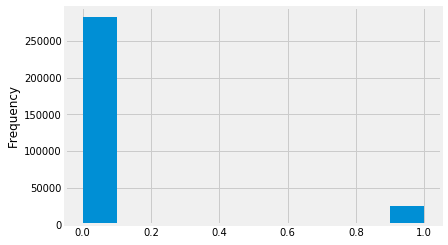

In [9]:
app_train['TARGET'].astype(int).plot.hist();
print(24825/(282686+24825))

In the 'TARGET' column, 0 indicates this applicant paid his/her loan on time, 1 indicates the applicant did not pay on time. 

It is interesting to think about the percentage of default payments. First, I checked the default rate of the U.S. in Aug, 2018, it was 0.65%, which is much lower than what we are looking at here: 8.07%. The data provider, which is Home Credit, claims that they offer reasonable rate for unbanked population. But with such a high default risk, and please note the applicants can not get loan with a low rate from regular bank, I'm curious about Home Credit's financial statement. Given the graph above, if the data is all the applicants they have, or a random sample from there database, it seems either they charge a high rate or they are currently suffering lose.

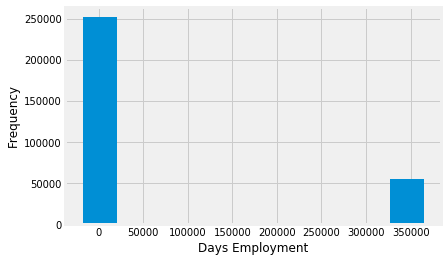

In [10]:
#It is reasonable to have a stable employment to pay your debt, let's take a look at the employment status of the applicants
app_train['DAYS_EMPLOYED'].plot.hist();
plt.xlabel('Days Employment');

In [11]:
# This doesn't look right
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Now we can say there are some outliers, the max days of empolyment looks too crazy.

In [12]:
outlier = app_train[app_train['DAYS_EMPLOYED'] == 365243]
not_outlier = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The not-outliers default on %0.2f%% of loans' % (100 * not_outlier['TARGET'].mean()))
print('The outliers default on %0.2f%% of loans' % (100 * outlier['TARGET'].mean()))
print('There are %d suspicious days of employment' % len(outlier))

The not-outliers default on 8.66% of loans
The outliers default on 5.40% of loans
There are 55374 suspicious days of employment


Well, it turns out the outliers have some contribution to the total default rate.

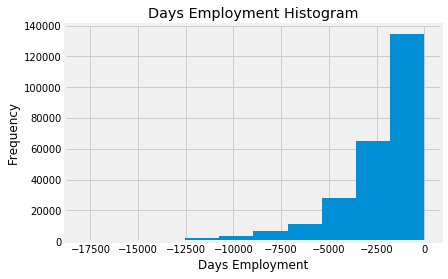

In [13]:
# Create a flag column
app_train['DAYS_EMPLOYED_outliers'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the outliers with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

This looks normal now. The x-axis is negative is because that the data represent the days of employment before the application.

Let's take a look at the applicants' financial situation

In [14]:
import seaborn as sns

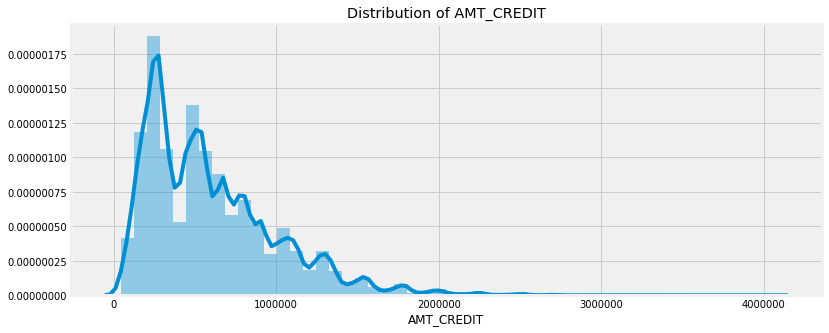

In [15]:
# Distribution of the loan amount
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])

In [16]:
app_train["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [17]:
# Income of the clients
app_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

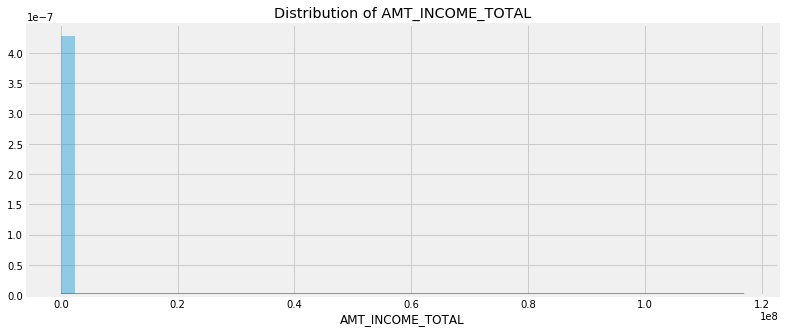

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(app_train["AMT_INCOME_TOTAL"].dropna())

There is someone make too much money per year, possible outlier.

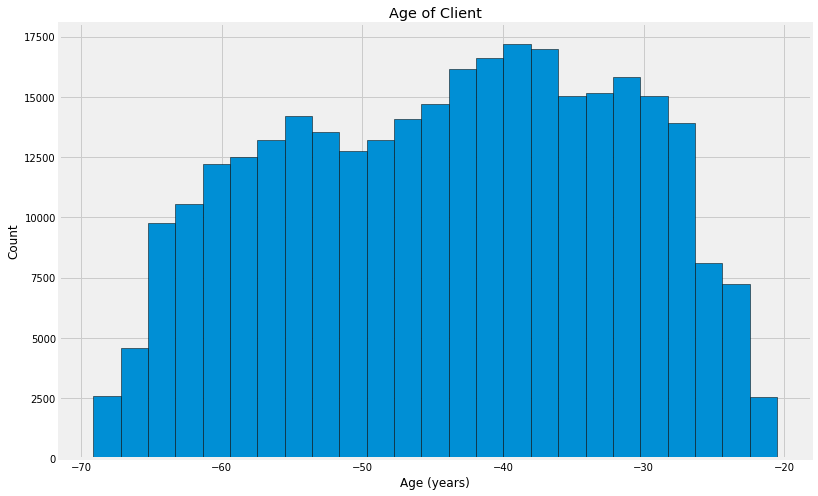

In [19]:
# Plot the distribution of ages in years
plt.figure(figsize=(12,8))
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


In [20]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

No obvious outliers in this column. Let's try to find the it there is any difference on the default rate between different ages.

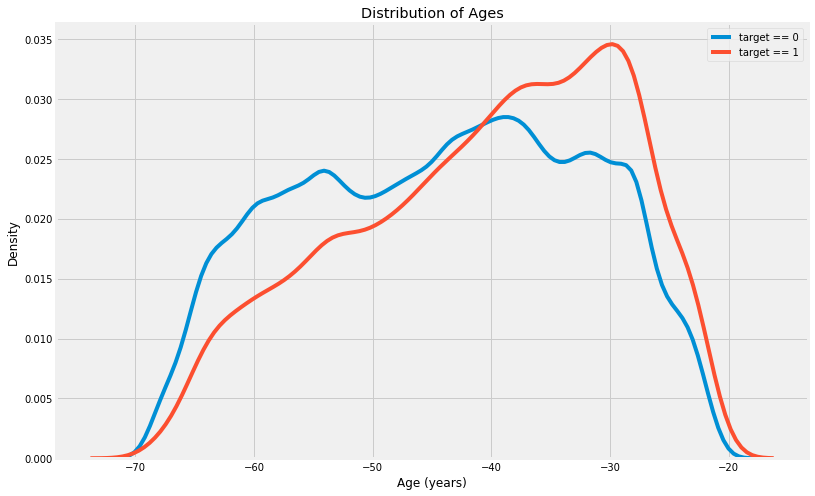

In [21]:
plt.figure(figsize=(12,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

This graph shows youger applicants has higher rate of default. 


I'm also curious about the percentage of different types of loan that Home Credit sold to their clients.

In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

In [23]:
temp = app_train["NAME_CONTRACT_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

Most of applicants took cash loans.

I also want to know more about the loan types, are they for properties or auto. Unfortunately, the dataset didn't provide that kind of information, only whetther the applicants own a property of a car at the moment they applied for the loan. I think this would be useful once we encoding them, it does somehow represent the financial situation and the life style of the applicants.

In [24]:
import cufflinks as cf
cf.go_offline()

# The applicants' income source
temp = app_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)

The majority of the applicants are regular worker, which is expected. What I didn't expected is that the percentage of student is only 0.00585%, percentage of unemployed is only 0.00715%. Once again, I start question that what's the percentage of unbanked(with low credit score or no credit score) in their applicants. If the applicants' credit score was questionable, the prediction we'll make in the future won't be accurate, due to the feature we choose.

In [25]:
temp = app_train["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan')

With the assumption that all applicants are unbanked, the graph above shows us not only the proportion of their client, but also, to some extent, can represent the proportion of unbanked population in the real world.

In [26]:
# Residential condition
temp = app_train["NAME_HOUSING_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Type of House', hole = 0.5)

It turns out 88.7% of the applicants own their own properties. This might be a good feature to be chosen.

### Now, my curiosity has been satisfied, let's take a look at the correlations between each variable and the TARGET

In [27]:
# Find correlations with the target
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_outliers       -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


This is a little bit suprising. Some columns we discussed above have high correlation with the TARGET, while some are not. And there are high negative correlations between the living conditions and the TARGET. Of course, I noticed that all the external data sources(only three of them) have the top three negative correlations. In the document they provide, the three columns are 'Normalized score from external data source'. We don't know how they computed those score, but we definatly need put those score into our model.

In [40]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [41]:
# Align the training and testing data, keep only columns present in both dataframes
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [42]:
# Find correlations with the target
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [43]:
# Separate the data and check their correlation
new_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
new_data_corrs = new_data.corr()
new_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
TARGET         1.000000     -0.155317     -0.160472     -0.178919    0.078239   
EXT_SOURCE_1  -0.155317      1.000000      0.213982      0.186846   -0.600610   
EXT_SOURCE_2  -0.160472      0.213982      1.000000      0.109167   -0.091996   
EXT_SOURCE_3  -0.178919      0.186846      0.109167      1.000000   -0.205478   
DAYS_BIRTH     0.078239     -0.600610     -0.091996     -0.205478    1.000000   
DAYS_EMPLOYED  0.074958     -0.252712     -0.093444     -0.129722    0.352321   

               DAYS_EMPLOYED  
TARGET              0.074958  
EXT_SOURCE_1       -0.252712  
EXT_SOURCE_2       -0.093444  
EXT_SOURCE_3       -0.129722  
DAYS_BIRTH          0.352321  
DAYS_EMPLOYED       1.000000

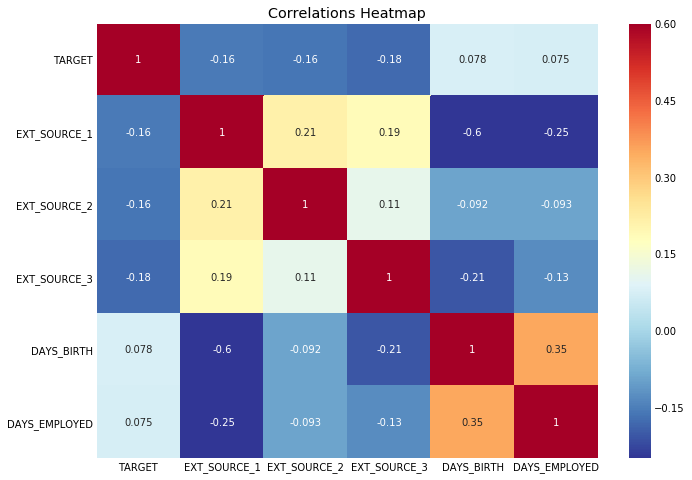

In [44]:
# Visualize the correlations
plt.figure(figsize = (10, 8))

# Heatmap of correlations
sns.heatmap(new_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlations Heatmap');

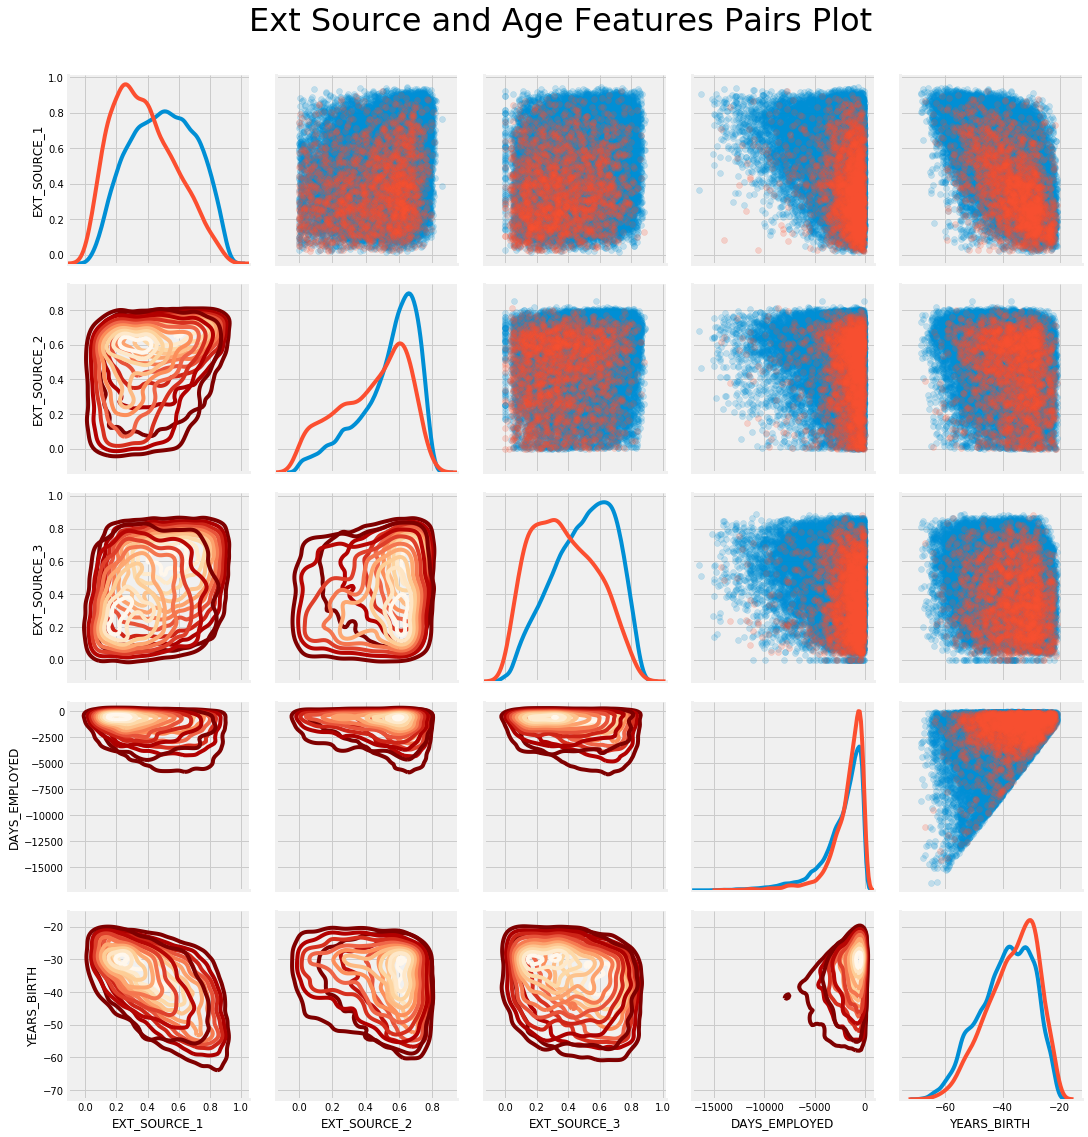

In [45]:
# Transfer age data from days to years
new_data['YEARS_BIRTH'] = new_data['DAYS_BIRTH'] / 365

# Copy the data for plotting
plot_data = new_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = new_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In [46]:
# After reviewing the rest 6 tables, I found the Previous Applications data might be helpful. First, here is the client type.

temp = pre_app["NAME_CLIENT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='Client Type in Previous Applications', 
         hole = 0.7,colors=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])

In [47]:
# Based on my experience, the channels of applicants might be useful

temp = pre_app['CHANNEL_TYPE'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='Channel Type', 
         hole = 0.7,colors=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])

In [48]:
# Let's make a different graph
temp = pre_app['CHANNEL_TYPE'].value_counts()
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=(temp / temp.sum())*100,
#         colorscale = 'Violet',
#         reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Channel Type ",
    xaxis=dict(
        title='Name of the Channel',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [49]:
#The status of previous applications
temp = pre_app['NAME_CONTRACT_STATUS'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='Previous Status', 
         hole = 0.7,colors=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])

In [50]:
# Baseline models
# Logistic Regression
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
features = list(train.columns)
test = app_test.copy()
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(app_test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)


Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [51]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [52]:
# Make predictions

log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [53]:
# Submission dataframe

submission = app_test[['SK_ID_CURR']]
submission['TARGET'] = log_reg_pred

submission.head()


SK_ID_CURR    TARGET
0      100001  0.066271
1      100005  0.128254
2      100013  0.084129
3      100028  0.060095
4      100038  0.128123

In [55]:
# Save the submission to a csv file
submission.to_csv('log_reg_baseline.csv', index = False)

### This one score 0.66069

In [56]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

/Users/xiangzhen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [57]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [58]:
# Make a submission dataframe
submission = app_test[['SK_ID_CURR']]
submission['TARGET'] = predictions

# Save the submission dataframe
submission.to_csv('random_forest_baseline.csv', index = False)

### This one scores higher, 0.67464. 

### Now, I'm going to try to improve it.

In [59]:
# Generate new features.

app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [60]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [61]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


In [62]:
# Make a submission dataframe
submission = app_test[['SK_ID_CURR']]
submission['TARGET'] = predictions

# Save the submission dataframe
submission.to_csv('random_forest_baseline_domain.csv', index = False)

### This one scores 0.68079, it is better.

### Now, let's try LightGBM.

In [63]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

import gc

In [64]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [65]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [66]:
train_control = pd.read_csv('../capstone#1/application_train.csv')
test_control = pd.read_csv('../capstone#1/application_test.csv')

In [67]:
submission, fi, metrics = model(train_control, test_control)

Training Data Shape:  (307511, 241)
Testing Data Shape:  (48744, 241)
Training until validation scores don't improve for 100 rounds.
[200]	valid's binary_logloss: 0.561913	valid's auc: 0.760007	train's binary_logloss: 0.553723	train's auc: 0.798103
Early stopping, best iteration is:
[269]	valid's binary_logloss: 0.555207	valid's auc: 0.760273	train's binary_logloss: 0.544131	train's auc: 0.809199
Training until validation scores don't improve for 100 rounds.
[200]	valid's binary_logloss: 0.566651	valid's auc: 0.76114	train's binary_logloss: 0.55348	train's auc: 0.798328
Early stopping, best iteration is:
[289]	valid's binary_logloss: 0.558103	valid's auc: 0.761398	train's binary_logloss: 0.540939	train's auc: 0.812654
Training until validation scores don't improve for 100 rounds.
[200]	valid's binary_logloss: 0.564639	valid's auc: 0.750232	train's binary_logloss: 0.552049	train's auc: 0.79964
Early stopping, best iteration is:
[265]	valid's binary_logloss: 0.558629	valid's auc: 0.75045

In [68]:
metrics

fold     train     valid
0        0  0.809199  0.760273
1        1  0.812654  0.761398
2        2  0.809734  0.750451
3        3  0.811121  0.760245
4        4  0.802236  0.760972
5  overall  0.808989  0.758635

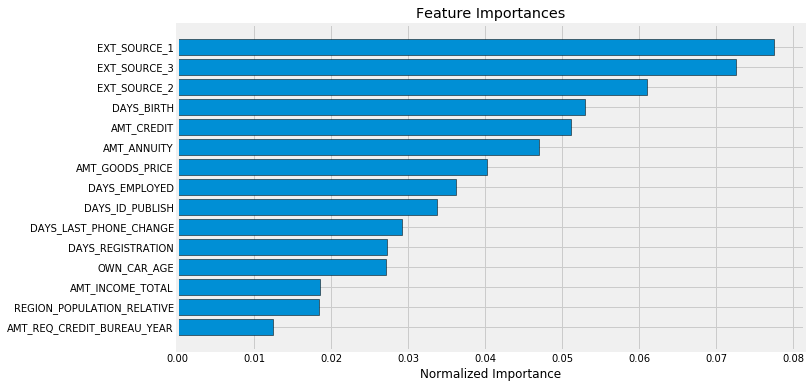

In [69]:
fi_sorted = plot_feature_importances(fi)

In [70]:
submission.to_csv('lgb.csv', index = False)

### Power of LightGBM, this submission scored 0.74436.

### Apply Bayesian optimization

In [73]:
from sklearn.model_selection import train_test_split
N_FOLDS = 5
MAX_EVALS = 5

In [74]:
features = pd.read_csv('../capstone#1/application_train.csv')

features = features.sample(n = 16000, random_state = 42)

features = features.select_dtypes('number')

# Extract the labels
labels = np.array(features['TARGET'].astype(np.int32)).reshape((-1, ))
features = features.drop(columns = ['TARGET', 'SK_ID_CURR'])

# Split into training and testing data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 6000, random_state = 42)

print('Train shape: ', train_features.shape)
print('Test shape: ', test_features.shape)

Train shape:  (10000, 104)
Test shape:  (6000, 104)


In [75]:
train_features.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
99825              2           99000.0    562491.0      27189.0   
208378             0          157500.0    677664.0      34731.0   
1309               2          112500.0    864000.0      25393.5   
172223             1           63000.0    180000.0       9000.0   
258157             0          202500.0   1193580.0      42417.0   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
99825          454500.0                    0.007330      -10901   
208378         585000.0                    0.024610      -12091   
1309           864000.0                    0.028663      -11922   
172223         180000.0                    0.020246      -14570   
258157         855000.0                    0.020713      -20925   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  \
99825            -603             -574.0            -3572  ...   
208378          -1358            -2918.0            -3715  ...   
1309            -1868            -1465.0            -4580  ...   
172223          -7753            -5007.0            -4719  ...   
258157          -1049            -3149.0            -4437  ...   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
99825                  0                 0                 0   
208378                 0                 0                 0   
1309                   0                 0                 0   
172223                 0                 0                 0   
258157                 0                 0                 0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
99825                  0                         0.0   
208378                 0                         0.0   
1309                   0                         0.0   
172223                 0                         NaN   
258157                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
99825                         0.0                         0.0   
208378                        0.0                         0.0   
1309                          0.0                         0.0   
172223                        NaN                         NaN   
258157                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
99825                         0.0                        0.0   
208378                        0.0                        1.0   
1309                          0.0                        0.0   
172223                        NaN                        NaN   
258157                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
99825                          0.0  
208378                         6.0  
1309                           1.0  
172223                         NaN  
258157                         1.0  

[5 rows x 104 columns]

In [76]:
model = lgb.LGBMClassifier(random_state=50)

# Training set
train_set = lgb.Dataset(train_features, label = train_labels)
test_set = lgb.Dataset(test_features, label = test_labels)

In [78]:
hyperparameters = model.get_params()

# Using early stopping to determine number of estimators.
del hyperparameters['n_estimators']

# Perform cross validation with early stopping
cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, metrics = 'auc', 
           early_stopping_rounds = 100, verbose_eval = False, seed = 42)

# Highest score
best = cv_results['auc-mean'][-1]

# Standard deviation of best score
best_std = cv_results['auc-stdv'][-1]

print(best, best_std)

0.7086677132262189 0.020976363997421872


In [79]:
model.n_estimators = len(cv_results['auc-mean'])

# Train and make predicions with model
model.fit(train_features, train_labels)
preds = model.predict_proba(test_features)[:, 1]
baseline_auc = roc_auc_score(test_labels, preds)

print(baseline_auc)

0.7146561479221355
